In [ ]:
!pip install tensorflow
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, LSTM, Embedding
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
import pickle 
import numpy as np
import os

In [ ]:

file=open('Names.txt', 'r', encoding='utf-8')
lines=[]
for i in file:
    lines.append(i)
print("The First Line: ", lines[0])
print("The Last Line: ", lines[-1])

The First Line:  One morning, when Gregor Samsa woke from troubled dreams, he found

The Last Line:  Why it worked at that time is a mystery.


In [ ]:
data=""

for i in lines:
    data=' '.join(lines)
data=data.replace('\n','').replace('\r','').replace('\ufeff','')
data[:360]

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin.  He lay on his armour-like back, and if he lifted his head a little he could see his brown belly, slightly domed and divided by arches into stiff sections.  The bedding was hardly able to cover it and seemed ready to slide off any moment.'

In [ ]:
z=[]
for i in data.split():
    if i not in z:
        z.append(i)
data=' '.join(z)

In [ ]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts([data])
pickle.dump(tokenizer, open('tokenizer1.pkl','wb'))
sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data

[17,
 69,
 275,
 7,
 42,
 1424,
 276,
 1425,
 578,
 30,
 1426,
 43,
 1427,
 13,
 122,
 123,
 579,
 124,
 580,
 1428,
 30,
 581,
 70,
 1429,
 18,
 125,
 31,
 126,
 1430,
 127,
 71,
 128,
 72,
 1431,
 277,
 278,
 1432,
 1433,
 279,
 1434,
 582,
 1435,
 73,
 1436,
 32,
 583,
 1437,
 33,
 1438,
 4,
 584,
 280,
 1439,
 129,
 1440,
 130,
 122,
 1441,
 281,
 1442,
 1443,
 1444,
 74,
 73,
 1445,
 131,
 585,
 44,
 1446,
 132,
 1447,
 282,
 283,
 133,
 134,
 9,
 284,
 4,
 1448,
 586,
 19,
 1449,
 587,
 19,
 285,
 45,
 588,
 589,
 590,
 1450,
 591,
 1451,
 286,
 124,
 1452,
 1453,
 1454,
 1455,
 34,
 135,
 287,
 1456,
 592,
 20,
 1457,
 593,
 6,
 136,
 1458,
 1459,
 594,
 1460,
 1461,
 1462,
 75,
 1463,
 288,
 1464,
 595,
 1465,
 596,
 289,
 1466,
 137,
 1467,
 138,
 1468,
 597,
 1469,
 1470,
 290,
 139,
 1471,
 598,
 1472,
 1473,
 10,
 599,
 21,
 291,
 292,
 1474,
 600,
 601,
 602,
 35,
 140,
 1475,
 603,
 293,
 604,
 44,
 605,
 1476,
 141,
 142,
 46,
 143,
 294,
 295,
 1477,
 36,
 11,
 1478,
 2

In [ ]:
vocab_size=len(tokenizer.word_index) + 1
print(vocab_size)

5232


In [ ]:
sequences = []
for i in range(1, len(sequence_data)):
    words=sequence_data[i-1:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  7973


array([[  17,   69],
       [  69,  275],
       [ 275,    7],
       [   7,   42],
       [  42, 1424],
       [1424,  276],
       [ 276, 1425],
       [1425,  578],
       [ 578,   30],
       [  30, 1426]])

In [ ]:
X=[]
y=[]
for i in sequences:
    X.append(i[0])
    y.append(i[1])
X=np.array(X)
y=np.array(y)

In [ ]:
y=to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
model=Sequential()
model.add(Embedding(vocab_size, 60, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 60)             313920    
_________________________________________________________________
lstm (LSTM)                  (None, 1, 1000)           4244000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 1000)              8004000   
_________________________________________________________________
dense (Dense)                (None, 1000)              1001000   
_________________________________________________________________
dense_1 (Dense)              (None, 5232)              5237232   
Total params: 18,800,152
Trainable params: 18,800,152
Non-trainable params: 0
_________________________________________________________________


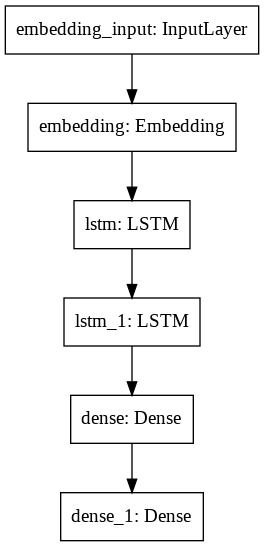

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_layer_names=True)

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import TensorBoard

In [ ]:
checkpoint=ModelCheckpoint("network1.h5", monitor='loss', verbose=1,
                          save_best_only=True, mode='auto')
reduce=ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)
logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001))

In [ ]:
model.fit(X, y, epochs=150, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])


Epoch 1/150
  1/125 [..............................] - ETA: 0s - loss: 8.5626WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
125/125 [==============================] - ETA: 0s - loss: 8.5705
Epoch 00001: loss improved from inf to 8.57052, saving model to network1.h5
125/125 [==============================] - 2s 19ms/step - loss: 8.5705
Epoch 2/150
124/125 [============================>.] - ETA: 0s - loss: 8.4685
Epoch 00002: loss improved from 8.57052 to 8.46717, saving model to network1.h5
125/125 [==============================] - 2s 18ms/step - loss: 8.4672
Epoch 3/150
122/125 [============================>.] - ETA: 0s - loss: 8.2137
Epoch 00003: loss improved from 8.46717 to 8.21397, saving model to network1.h5
125/125 [==============================] - 2s